In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.8.0


In [6]:
train_x = np.arange(100).astype(np.float32).reshape(-1, 1)
train_y = 3 * train_x + 1

train_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y))
# tensor로 변형해주어 셔플같은 기능을 사용할 수 있음
train_ds = train_ds.shuffle(10).batch(32)

print(train_ds)

for x, y in train_ds:
    print(x.shape, y.shape, '\n')

<BatchDataset element_spec=(TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>
(32, 1) (32, 1) 

(32, 1) (32, 1) 

(32, 1) (32, 1) 

(4, 1) (4, 1) 



In [12]:
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.data import Dataset

In [16]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_ds = Dataset.from_tensor_slices((train_images, train_labels))
train_ds = train_ds.shuffle(60000).batch(9)

test_ds = Dataset.from_tensor_slices((test_images, test_labels))
test_ds = train_ds.batch(9)


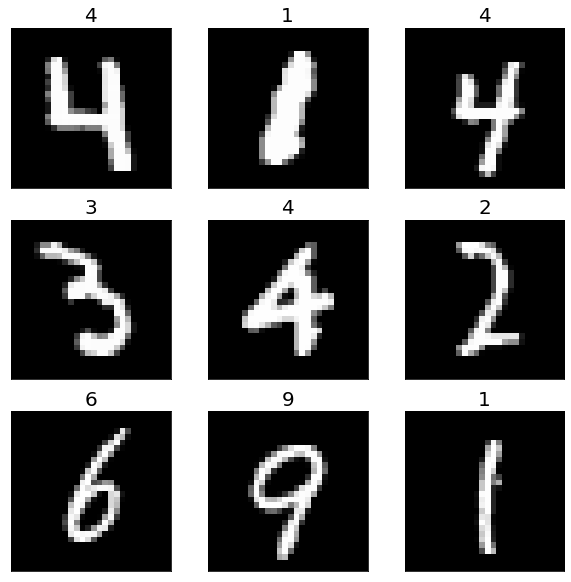

In [35]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

train_ds_iter = iter(train_ds)
images, labels = next(train_ds_iter)

for ax_idx, ax in enumerate(axes.flat):
    image = images[ax_idx, ...]
    label = labels[ax_idx]
    
    # numpy()로 변환
    ax.imshow(image.numpy(), 'gray')
    ax.set_title(label.numpy(), fontsize=20)

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)